### Performing simple data frame transformations which can be used in the final project notebook

In [1]:
import pandas as pd

FILE_PATH = '../data/winemag-data_first150k.csv'
raw_data = pd.read_csv(FILE_PATH, index_col=0)

# I'm going to use only 2 columns to perform our task. Our predictor variable is going to be "description" and target variable is "variety"
# We want to simulate the situation where there are only a text field and target value field provided.

df = raw_data[['description', 'variety']]


In [2]:
# simple inital data analysis
print('shape', df.shape)
print('----------------\n')
print('null values:')
print(df.isna().sum())

shape (150930, 2)
----------------

null values:
description    0
variety        0
dtype: int64


In [3]:
# checking out for duplicated descriptions

desc_duplicates = df[df.duplicated(subset=['description'], keep=False)]

# just to check what kind of duplicated valeus we have
desc_duplicates = desc_duplicates.sort_values(by='description')

desc_duplicates.head(30)


,description,variety
147725,$11. Opens with a highly perfumed bouquet of l...,Chardonnay
62345,$11. Opens with a highly perfumed bouquet of l...,Chardonnay
74993,). Very good wine from a winery increasingly k...,Cabernet Sauvignon
18803,). Very good wine from a winery increasingly k...,Cabernet Sauvignon
26530,". Christoph Neumeister's top wine, this is a c...",Sauvignon Blanc
84730,". Christoph Neumeister's top wine, this is a c...",Sauvignon Blanc
53110,". Christoph Neumeister's top wine, this is a c...",Sauvignon Blanc
107351,. From a small south-facing parcel next to the...,Chenin Blanc
65231,. From a small south-facing parcel next to the...,Chenin Blanc
43074,. Lemon zest and exotic spices enliven the nos...,Riesling


In [4]:
# dropping duplicates
df = df.drop_duplicates(subset=['description'], keep='last')
df

,description,variety
0,This tremendous 100% varietal wine hails from ...,Cabernet Sauvignon
1,"Ripe aromas of fig, blackberry and cassis are ...",Tinta de Toro
2,Mac Watson honors the memory of a wine once ma...,Sauvignon Blanc
3,"This spent 20 months in 30% new French oak, an...",Pinot Noir
4,"This is the top wine from La Bégude, named aft...",Provence red blend
...,...,...
150925,Many people feel Fiano represents southern Ita...,White Blend
150926,"Offers an intriguing nose with ginger, lime an...",Champagne Blend
150927,This classic example comes from a cru vineyard...,White Blend
150928,"A perfect salmon shade, with scents of peaches...",Champagne Blend


In [5]:
# finding top 15 varieties
%time
top_fifteen_varieties = df['variety'].value_counts().head(15).to_frame()
top_fifteen_varieties

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


,variety
Pinot Noir,9283
Chardonnay,9159
Cabernet Sauvignon,8267
Red Blend,6484
Bordeaux-style Red Blend,5170
Sauvignon Blanc,4034
Syrah,3662
Riesling,3582
Merlot,3176
Zinfandel,2408


In [6]:
# finding top 15 the other way - with "groupby"
%time
top_15 = df.groupby('variety').nunique().sort_values('description', ascending=False).head(15)
top_15

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.01 µs


,description,variety
variety,,
Pinot Noir,9283,1
Chardonnay,9159,1
Cabernet Sauvignon,8267,1
Red Blend,6484,1
Bordeaux-style Red Blend,5170,1
Sauvignon Blanc,4034,1
Syrah,3662,1
Riesling,3582,1
Merlot,3176,1


In [7]:
# a series of the top 15 varieties
top_fifteen_varieties = top_fifteen_varieties.index

In [8]:
top_fifteen_varieties = top_fifteen_varieties.to_list()

In [9]:
# creating a Dataframe with the top 15 varieties only
only_top_15_varieties = df.loc[df['variety'].isin(top_fifteen_varieties)]
raw_data_cleaned = only_top_15_varieties.reset_index().drop(columns='index')
raw_data_cleaned

,description,variety
0,This tremendous 100% varietal wine hails from ...,Cabernet Sauvignon
1,Mac Watson honors the memory of a wine once ma...,Sauvignon Blanc
2,"This spent 20 months in 30% new French oak, an...",Pinot Noir
3,This re-named vineyard was formerly bottled as...,Pinot Noir
4,The producer sources from two blocks of the vi...,Pinot Noir
...,...,...
64728,"This needs a good bit of breathing time, then ...",Pinot Noir
64729,The nose is dominated by the attractive scents...,Pinot Noir
64730,"Decades ago, Beringer’s then-winemaker Myron N...",White Blend
64731,Many people feel Fiano represents southern Ita...,White Blend


In [10]:
from io import StringIO
col = ['variety', 'description']
df = raw_data_cleaned[col]
df = df[pd.notnull(df['description'])]
df.columns = ['variety', 'description']

# assigning category to wine variety
df['category_id'] = df['variety'].factorize()[0]
category_id_df = df[['variety', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'variety']].values)
raw_data_cleaned = df
raw_data_cleaned.head()

,variety,description,category_id
0,Cabernet Sauvignon,This tremendous 100% varietal wine hails from ...,0
1,Sauvignon Blanc,Mac Watson honors the memory of a wine once ma...,1
2,Pinot Noir,"This spent 20 months in 30% new French oak, an...",2
3,Pinot Noir,This re-named vineyard was formerly bottled as...,2
4,Pinot Noir,The producer sources from two blocks of the vi...,2


In [11]:
# # pickling to use it later
# PICKLE_PATH = '../data/pickles/raw_data_cleaned.pkl'
# raw_data_cleaned.to_pickle(PICKLE_PATH)

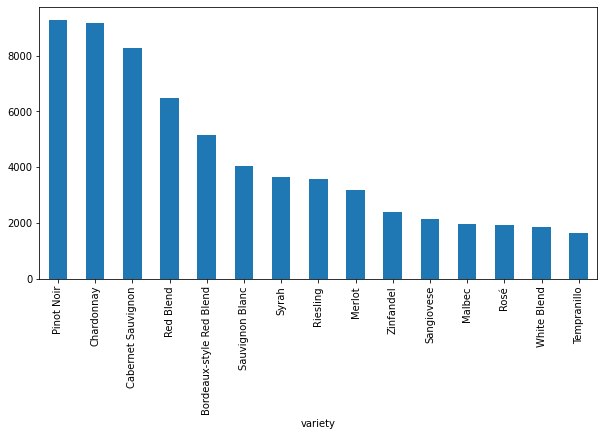

In [12]:
# imbalanced classes
# in the table above, we can see that the dataset is heavily imbalanced, lets' plot it

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5))
raw_data_cleaned.groupby('variety').description.count().sort_values(ascending=False).plot.bar(ylim=0)
plt.show()

In [14]:
# Text representation

# we are going to use the bag-of-words model

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True,
                        min_df=5,
                        norm='l2',
                        encoding='latin-1',
                        ngram_range=(1,1),
                        stop_words='english')

features = tfidf.fit_transform(raw_data_cleaned['description']).toarray()
labels = raw_data_cleaned['variety']

features.shape


(64733, 9244)

In [18]:
df2 = pd.DataFrame(features, columns=tfidf.get_feature_names())
df2

,000,01,02,03,04,05,06,07,08,09,...,zingy,zinny,zins,zip,zippy,zips,zone,zonin,zweigelt,émilion
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64728,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# # We can use sklearn.feature_selection.chi2 to find the terms that are the most 
# # correlated with each of the variety

# from sklearn.feature_selection import chi2
# import numpy as np

# N=2
# for variety, category_id in sorted(category_to_id.items()):
#     features_chi2 = chi2(features, labels == category_id)
#     indices = np.argsort(features_chi2[0])
#     feature_names = np.array(tfidf.get_feature_names())[indices]
#     unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
#     bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
#     print("# '{}':".format(variety))
#     print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
#     print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Bordeaux-style Red Blend':
  . Most correlated unigrams:
. finshes
. émilion
  . Most correlated bigrams:
. 
# 'Cabernet Sauvignon':
  . Most correlated unigrams:
. finshes
. émilion
  . Most correlated bigrams:
. 
# 'Chardonnay':
  . Most correlated unigrams:
. finshes
. émilion
  . Most correlated bigrams:
. 


KeyboardInterrupt: 

In [ ]:
# # creating a base line. How would the model predict the verieties without changing anything with description
# # (just wondering)

# # TODO: THE DATASET NEEDS TO BE PREPARED FIRST. THE ALGORITHMS CAN'T HANDLE TEXT DATA

# X, y = raw_data_cleaned['description'], raw_data_cleaned['variety']

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# let's try for the most popular classifiers